# Analyze solution
This notebooks provides scripts to analyze specific solution.

## Test data
Change path to a relevant solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import geopandas as gpd
import json
from analyze_solution import *

solution_dir = "../experiments/demo/out/base_balance.delivery.100"

# solution geo json
solution_geo_file_path = '{}/solution_0.geojson'.format(solution_dir)
if Path(solution_geo_file_path).is_file():
    solution_geo = gpd.read_file(solution_geo_file_path)

# solution json
with open('{}/solution_0.json'.format(solution_dir)) as json_file:
    solution = json.load(json_file)

## TODO

* print problem objective
* require problem file
* move initialization part outside of notebook

## Solution statistics

In [2]:
extrac_solution_statistics(solution)

,tours,unassigned,cost,distance,duration,driving,serving,waiting,break
0,5,0,691.5798,466574,94653,46653,30000,0,18000


## Tour statistics

In [3]:
extract_tours_statistic(solution)

,vehicleId,typeId,shiftIndex,stops,cost,distance,duration,driving,serving,waiting,break,max load,activities,deliveries,pickups,breaks,reloads
0,vehicle_5,vehicle,0,22,135.8664,89807,18581,8981,6000,0,3600,[20],23,20,0,1,0
1,vehicle_3,vehicle,0,22,146.4296,104898,20090,10490,6000,0,3600,[20],23,20,0,1,0
2,vehicle_2,vehicle,0,22,136.9258,91329,18732,9132,6000,0,3600,[20],23,20,0,1,0
3,vehicle_1,vehicle,0,22,136.8222,91186,18717,9117,6000,0,3600,[20],23,20,0,1,0
4,vehicle_4,vehicle,0,22,135.5358,89354,18533,8933,6000,0,3600,[20],23,20,0,1,0


In [4]:
extract_tours_statistic(solution).describe()

,shiftIndex,stops,cost,distance,duration,driving,serving,waiting,break,activities,deliveries,pickups,breaks,reloads
count,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,22.0,138.315960,93314.800000,18930.600000,9330.600000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
std,0.0,0.0,4.575059,6531.429989,653.754771,653.754771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,22.0,135.535800,89354.000000,18533.000000,8933.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
25%,0.0,22.0,135.866400,89807.000000,18581.000000,8981.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
50%,0.0,22.0,136.822200,91186.000000,18717.000000,9117.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
75%,0.0,22.0,136.925800,91329.000000,18732.000000,9132.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
max,0.0,22.0,146.429600,104898.000000,20090.000000,10490.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0


## Algorithm performance

To collect algorithm performance data, you need to run the solver with metrics enabled.

### overall statistic

In [5]:
(pd.json_normalize(solution['extras']['metrics']).drop('evolution', axis=1)
 .rename(columns={ 'duration': 'duration (sec)', 'speed': 'speed (gen/sec)' }))

,duration (sec),generations,speed (gen/sec)
0,3,3001,793.616589


### cost change over time/generation

* change `timestamp` to `number` in order to have generation number instead of timestamp.
* one of the fitness values is cost, exact index depends on the problem. Also cost is available as separate `cost` column

Typical objective values:
* number of unassigned
* number of tours
* cost
* work balance (duration, distance, activities)

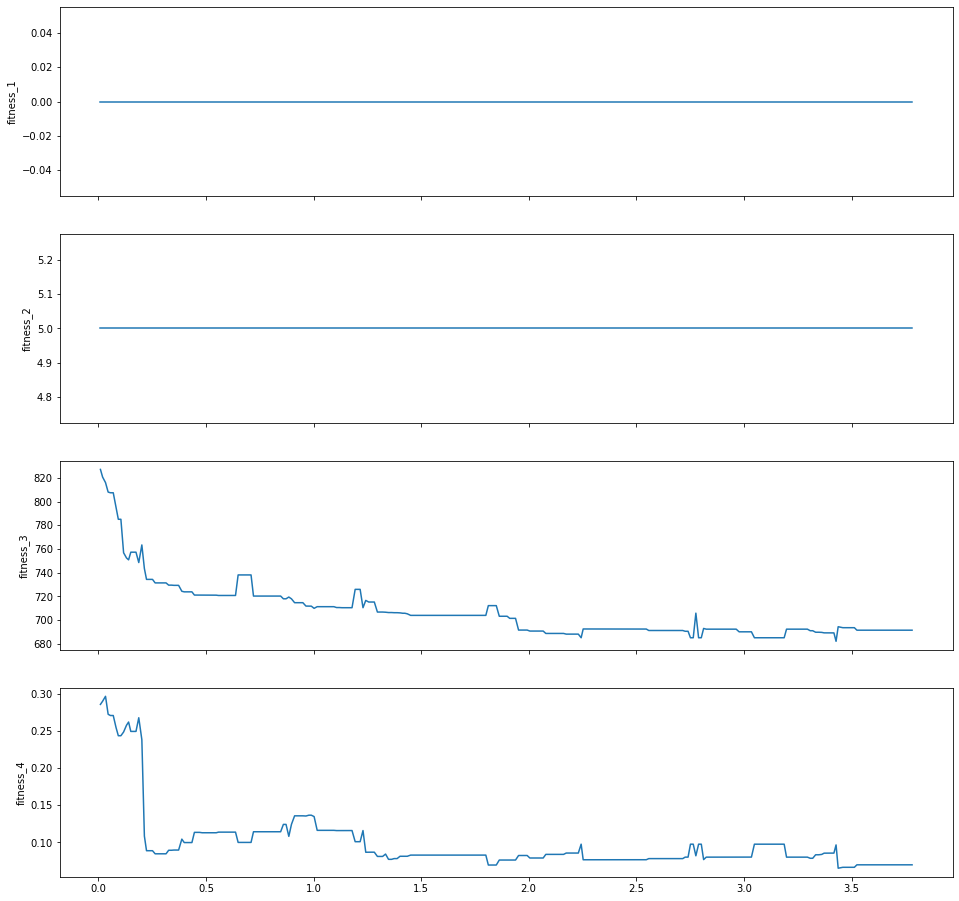

In [6]:
x_column = 'timestamp'

df = extract_evolution_metrics(solution)

fitness_columns = [column for column in df.columns.values if column.startswith('fitness_')]
plot_len = len(fitness_columns)
fig, axs = plt.subplots(plot_len, figsize=(16, plot_len * 4) , sharex=True)

for idx, fitness_column in enumerate(fitness_columns):
    axs[idx].plot(df[x_column], df[fitness_column])
    axs[idx].set(ylabel = fitness_column)

## Geojson Visualization

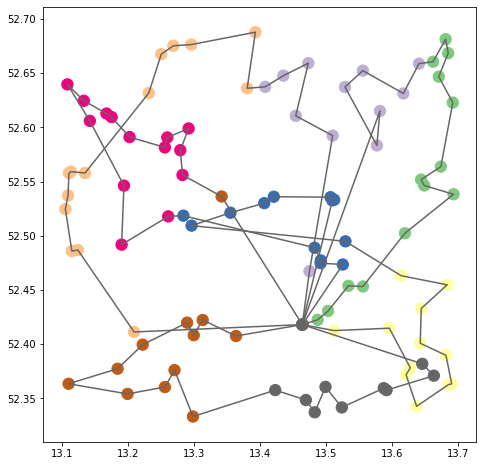

In [7]:
if not solution_geo.empty:
    plot = solution_geo.plot(cmap='Accent', markersize=128, figsize=(16,8))